<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/PCR_PSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCR and PLS  

In this example, we will compare the PCR and PLS methods. Our goal is to illustrate how PLS can outperform PCR when the target is strongly correlated with some directions in the data that have a low variance.



First, we load the data and perform a PCA.

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

food = pd.read_csv("https://userpage.fu-berlin.de/soga/data/raw-data/food-texture.csv")
# exclude first column
food = food.iloc[:, 1:]


scaler = StandardScaler().fit(food)
food_scaled = scaler.transform(food)
food_scaled=pd.DataFrame(food_scaled,columns=food.columns)
food_scaled.head()

,Oil,Density,Crispy,Fracture,Hardness
0,-0.445430,0.790272,-0.864754,0.395481,-1.011854
1,0.315989,-1.603262,1.410914,-2.191776,0.351131
2,-0.635784,0.100610,0.273080,-0.713344,0.480939
3,-0.318527,0.506293,-0.864754,1.873913,-1.076758
4,-0.572333,0.952546,-0.295837,0.949893,0.480939


Lets choose a target... we want to predict the Hardness.

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



food_pca = PCA().fit(food_scaled[['Oil',	'Density', 'Crispy', 'Fracture']])


food_pca_eigen = pd.DataFrame(
    food_pca.components_.T,
    columns=["PC1", "PC2", "PC3", "PC4"], #, "PC5"],
    index=food_scaled[['Oil',	'Density', 'Crispy', 'Fracture']].columns,
)

# Compute the loadings
food_pca_data=pd.DataFrame()
food_pca_data["PC"]=food_pca_eigen.columns
food_pca_data["Explained Variance"] = food_pca.explained_variance_
food_pca_data["Explained Variance Ratio"] = food_pca.explained_variance_ratio_
food_pca_data.set_index('PC')

# Compute the scores
food_pca_scores = pd.DataFrame(
    food_pca.transform(food_scaled[['Oil',	'Density', 'Crispy', 'Fracture']]),
    columns=["PC1", "PC2", "PC3", "PC4" ], #, "PC5"],
    index=food_scaled.index,
)

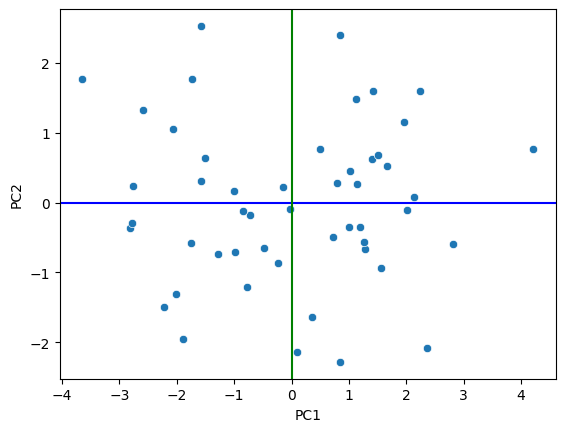

In [9]:
# Plot the scores
sns.scatterplot(data=food_pca_scores, x="PC1", y="PC2")
plt.axhline(0, color="blue")
plt.axvline(0, color="green")
plt.show()

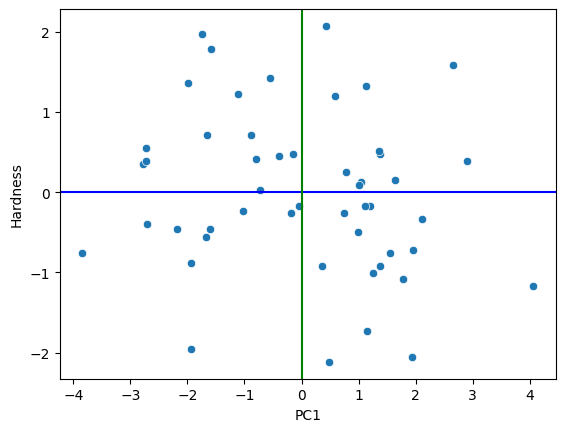

In [9]:
# Plot the scores
sns.scatterplot(x=food_pca_scores["PC1"], y=food_scaled['Hardness'])
plt.axhline(0, color="blue")
plt.axvline(0, color="green")
plt.show()

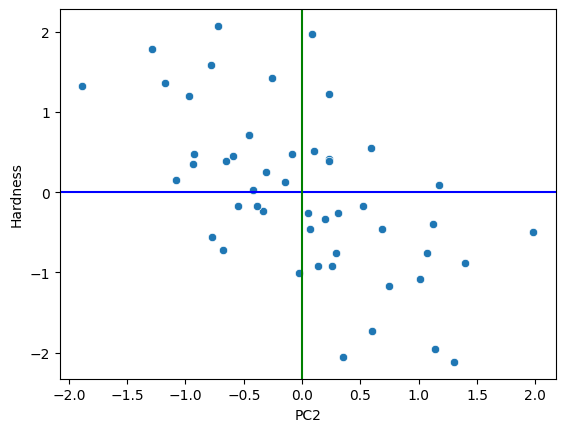

In [10]:
# Plot the scores
sns.scatterplot(x=food_pca_scores["PC2"], y=food_scaled['Hardness'])
plt.axhline(0, color="blue")
plt.axvline(0, color="green")
plt.show()

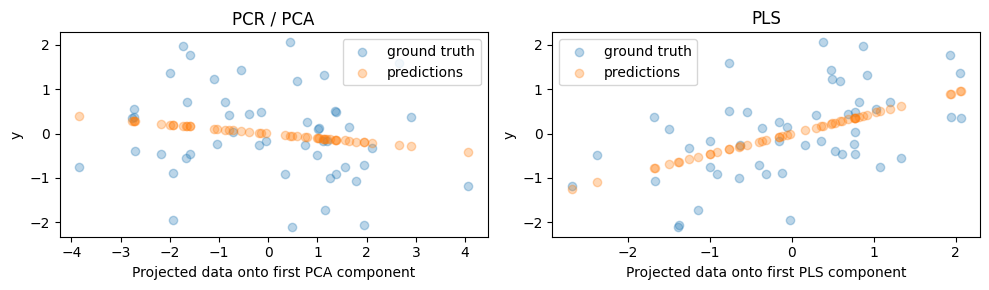

In [70]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
rng = np.random.RandomState(0)

X_train=food_scaled[['Oil',	'Density', 'Crispy', 'Fracture']]
y_train=food_scaled['Hardness']


pcr = make_pipeline(PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_train), y_train, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_train), pcr.predict(X_train), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_train), y_train, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_train), pls.predict(X_train), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()


In [71]:
print(f"PCR r-squared {pcr.score(X_train, y_train):.3f}")
print(f"PLS r-squared {pls.score(X_train, y_train):.3f}")

PCR r-squared 0.030
PLS r-squared 0.262


The unsupervised PCA transformation of PCR has dropped the second component, i.e. the direction with the lowest variance, despite it being the most predictive direction. This is because PCA is a completely unsupervised transformation, and results in the projected data having a low predictive power on the target.

On the other hand, the PLS regressor manages to capture the effect of the direction with the lowest variance, thanks to its use of target information during the transformation.




In [20]:
pca_2 = make_pipeline(PCA(n_components=2), LinearRegression())
pca_2.fit(X_train, y_train)
pls_2 = PLSRegression(n_components=2)
pls_2.fit(X_train, y_train)

print(f"PCR r-squared with 2 components {pca_2.score(X_train, y_train):.3f}")
print(f"PLS r-squared with 2 components {pls_2.score(X_train, y_train):.3f}")

PCR r-squared with 2 components 0.399
PLS r-squared with 2 components 0.430


In [21]:
pca_3 = make_pipeline(PCA(n_components=3), LinearRegression())
pca_3.fit(X_train, y_train)
pls_3 = PLSRegression(n_components=3)
pls_3.fit(X_train, y_train)

print(f"PCR r-squared with 3 components {pca_3.score(X_train, y_train):.3f}")
print(f"PLS r-squared with 3 components {pls_3.score(X_train, y_train):.3f}")

PCR r-squared with 2 components 0.406
PLS r-squared with 2 components 0.462


In [22]:
pca_4 = make_pipeline(PCA(n_components=3), LinearRegression())
pca_4.fit(X_train, y_train)
pls_4 = PLSRegression(n_components=3)
pls_4.fit(X_train, y_train)

print(f"PCR r-squared with 3 components {pca_4.score(X_train, y_train):.3f}")
print(f"PLS r-squared with 3 components {pls_4.score(X_train, y_train):.3f}")

PCR r-squared with 3 components 0.406
PLS r-squared with 3 components 0.462


This is the maximum r-squared we can get with this data set, and that is when we use all our datapoints in the training.


In the example above, we miss a couple of things... We did not to the test-train split as one always should do. Let's try that...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


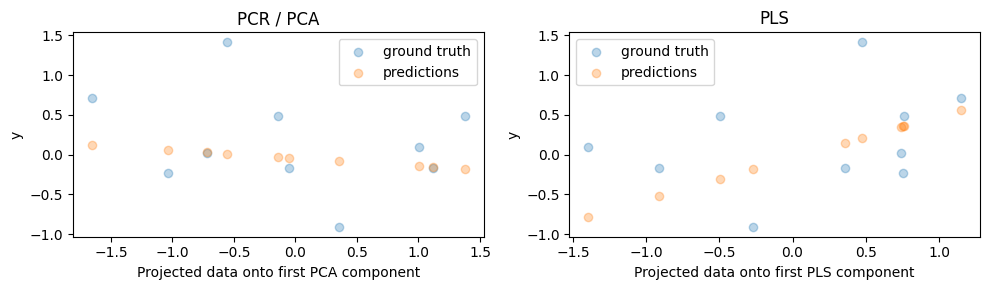

In [39]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
rng = np.random.RandomState(0)

X_train, X_test, y_train, y_test = train_test_split(food_scaled[['Oil',	'Density', 'Crispy', 'Fracture']], food_scaled['Hardness'],test_size=0.2, random_state=rng)


pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()


In [40]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared -0.065
PLS r-squared -0.124


Here we see that we indeed get a better performance for the PLS model, but we get quite bad models. The PLS regressor manages to capture the effect of the direction with the lowest variance, thanks to its use of target information during the transformation: it can recognize that this direction is actually the most predictive. We note that the first PLS component is negatively correlated with the target, how can this be?  

R$^2$  itself is defined as follows:

R$^2$ = 1 - $\frac{SS_{res}}{SS_{tot}}$ ...

and should lie between 0 and 1. if we get negative values, it must mean that $SS_{res}$ > $SS_{tot}$. Here, $SS_{Tot}$ represent the total variation in data, measured by the sum of squares of the difference between expected and actual values, computeted as

$SS_{Tot} = SS_{exp} + SS_{res} + ... $    

$SS_{exp}$ is the explained sum of squares prepresent and represent the variation in data explained by the fitted model. $SS_{res}$ is the residual sum of squares which represent the variation in data that is not explained by the fitted model. How can this be negative?

Well, because we evaluate models separately on train and test data. Following the above definitions, $SS_{tot}$ can be calculated using just the data itself, while $SS_{res}$ depends both on model predictions and the data. While we can use any arbitrary model to generate the predictions for scoring, we need to realize that the aforementioned equality is defined for models trained on the same data. Therefore, it doesn’t necessarily hold true when we use test data to evaluate models built on train data! There is no guarantee that the differences between a foreign model’s predictions and the data is smaller than the variation within the data itself.

In short, R$^2$ is only the square of correlation if we happen to be (1) using linear regression models, and (2) are evaluating them on the same data they are fitted (as established previously).


We can also look at the mean absolute error and the mean squared error...

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
y_pred_PCR= pcr.predict(X_test)
y_pred_PSL= pls.predict(X_test)


print(f"PCR MAE with 1 component {mean_absolute_error(y_test, y_pred_PCR):.3f}")
print(f"PLS MAE with 1 component {mean_absolute_error(y_test, y_pred_PSL):.3f}")
print(f"PCR MSE with 1 component {mean_squared_error(y_test, y_pred_PCR):.3f}")
print(f"PLS MSE with 1 component {mean_squared_error(y_test, y_pred_PSL):.3f}")

PCR MAE with 1 component 0.468
PLS MAE with 1 component 0.545
PCR MSE with 1 component 0.388
PLS MSE with 1 component 0.410


In [54]:
pca_2 = make_pipeline(PCA(n_components=2), LinearRegression())
pca_2.fit(X_train, y_train)
pls_2 = PLSRegression(n_components=2)
pls_2.fit(X_train, y_train)

print(f"PCR r-squared with 2 components {pca_2.score(X_test, y_test):.3f}")
print(f"PLS r-squared with 2 components {pls_2.score(X_test, y_test):.3f}")

PCR r-squared with 2 components -0.291
PLS r-squared with 2 components -0.304


In [55]:
pca_3 = make_pipeline(PCA(n_components=3), LinearRegression())
pca_3.fit(X_train, y_train)
pls_3 = PLSRegression(n_components=3)
pls_3.fit(X_train, y_train)

print(f"PCR r-squared with 3 components {pca_3.score(X_test, y_test):.3f}")
print(f"PLS r-squared with 3 components {pls_3.score(X_test, y_test):.3f}")

PCR r-squared with 3 components -0.340
PLS r-squared with 3 components -0.270


In [56]:
pca_4 = make_pipeline(PCA(n_components=4), LinearRegression())
pca_4.fit(X_train, y_train)
pls_4 = PLSRegression(n_components=4)
pls_4.fit(X_train, y_train)

print(f"PCR r-squared with 3 components {pca_4.score(X_test, y_test):.3f}")
print(f"PLS r-squared with 3 components {pls_4.score(X_test, y_test):.3f}")

PCR r-squared with 3 components -0.260
PLS r-squared with 3 components -0.260


In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
y_pred_PCR= pca_2.predict(X_test)
y_pred_PSL= pls_2.predict(X_test)



print(f"PCR MAE with 1 component {mean_absolute_error(y_test, y_pred_PCR):.3f}")
print(f"PLS MAE with 1 component {mean_absolute_error(y_test, y_pred_PSL):.3f}")
print(f"PCR MSE with 1 component {mean_squared_error(y_test, y_pred_PCR):.3f}")
print(f"PLS MSE with 1 component {mean_squared_error(y_test, y_pred_PSL):.3f}")

PCR MAE with 1 component 0.602
PLS MAE with 1 component 0.599
PCR MSE with 1 component 0.471
PLS MSE with 1 component 0.475


## So when is the PLS better that PCR?

PLS can outperform PCR when the target is strongly correlated with some directions in the data that have a low variance. Lets look at a toy example, again doing the PCA followed by PCR and PLS.

Lets look at the following data and do a PCA on it:

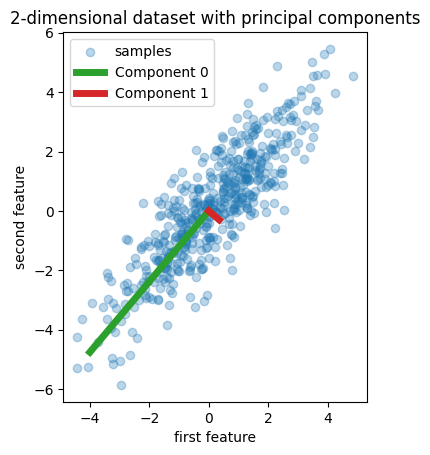

In [87]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)


plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

 We now define the target y such that it is strongly correlated with a direction that has a small variance. To this end, we will project X onto the second component, and add some noise to it.

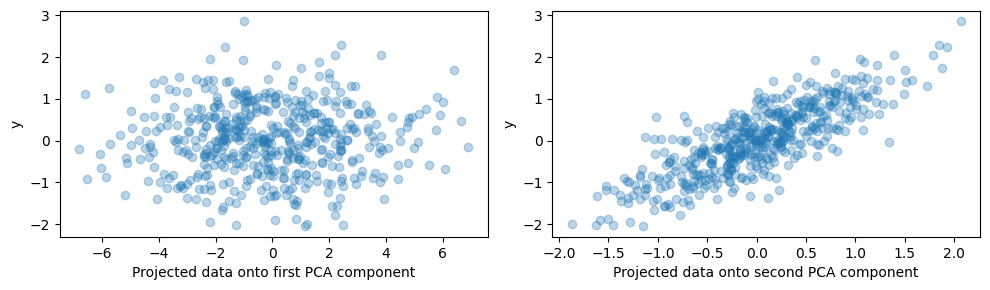

In [88]:
y = X.dot(pca.components_[1]) + rng.normal(size=n_samples) / 2

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].scatter(X.dot(pca.components_[0]), y, alpha=0.3)
axes[0].set(xlabel="Projected data onto first PCA component", ylabel="y")
axes[1].scatter(X.dot(pca.components_[1]), y, alpha=0.3)
axes[1].set(xlabel="Projected data onto second PCA component", ylabel="y")
plt.tight_layout()
plt.show()

Let's do the PCR and PLS on hits data:

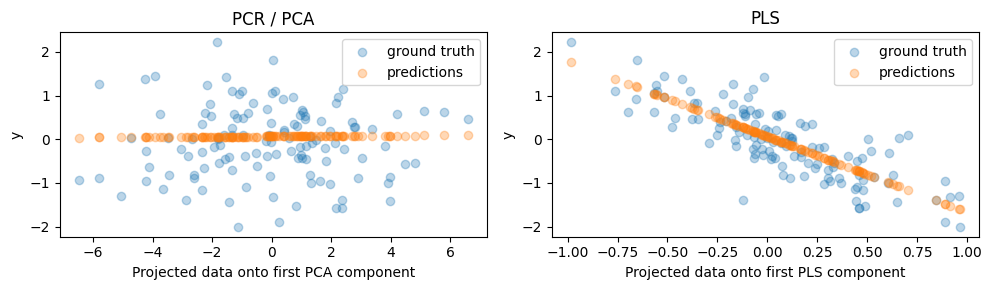

In [89]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

As seen above, the unsupervised PCA transformation of PCR has dropped the second component, i.e. the direction with the lowest variance, despite it being the most predictive direction. This is because PCA is a completely unsupervised transformation, and results in the projected data having a low predictive power on the target.

On the other hand, the PLS regressor manages to capture the effect of the direction with the lowest variance, thanks to its use of target information during the transformation: it can recognize that this direction is actually the most predictive. We note that the first PLS component is negatively correlated with the target, which comes from the fact that the signs of eigenvectors are arbitrary.

We also print the R-squared scores of both estimators, which further confirms that PLS is a better alternative than PCR in this case. A negative R-squared indicates that PCR performs worse than a regressor that would simply predict the mean of the target.

In [90]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared -0.026
PLS r-squared 0.658


and the corresponfding MAE and MSE

In [91]:

y_pred_PCR= pcr.predict(X_test)
y_pred_PSL= pls.predict(X_test)



print(f"PCR MAE with 1 component {mean_absolute_error(y_test, y_pred_PCR):.3f}")
print(f"PLS MAE with 1 component {mean_absolute_error(y_test, y_pred_PSL):.3f}")
print(f"PCR MSE with 1 component {mean_squared_error(y_test, y_pred_PCR):.3f}")
print(f"PLS MSE with 1 component {mean_squared_error(y_test, y_pred_PSL):.3f}")

PCR MAE with 1 component 0.660
PLS MAE with 1 component 0.380
PCR MSE with 1 component 0.680
PLS MSE with 1 component 0.226


As previously, we can increase more components which should make the model better:

In [92]:
pca_2 = make_pipeline(PCA(n_components=2), LinearRegression())
pca_2.fit(X_train, y_train)
print(f"PCR r-squared with 2 components {pca_2.score(X_test, y_test):.3f}")

PCR r-squared with 2 components 0.673


We note that PCR with 2 components performs as well as PLS: this is because in this case, PCR was able to leverage the second component which has the most preditive power on the target.

### Conclusion
Indeed, the dimensionality reduction of PCA projects the data into a lower dimensional space where the variance of the projected data is greedily maximized along each axis. Despite them having the most predictive power on the target, the directions with a lower variance will be dropped, and the final regressor will not be able to leverage them.

PLS is both a transformer and a regressor, and it is quite similar to PCR: it also applies a dimensionality reduction to the samples before applying a linear regressor to the transformed data. The main difference with PCR is that the PLS transformation is supervised. Therefore, as we will seen in this example, it does not suffer from the issue we just mentioned.